# Pierce - Pathway Analysis
Author: Leo Joseph (l1joseph@ucsd.edu)
The purpose of the notebook is to perform pathway  analysis on ASD versus TD samples.

In [1]:
# qiime2 imports
import qiime2 as q2
from qiime2 import Artifact, Metadata, Visualization
from qiime2.plugins.feature_table.methods import filter_features, filter_samples

# birdman imports
import biom
import pandas as pd
import numpy as np

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## Load Artifacts

In [2]:
ec = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195333_ec.zebra.tp-td.biom')
ko = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195334_ko.zebra.tp-td.biom')
pathway = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195331_pathway.zebra.tp-td.biom')

md = Metadata.load('/home/lpatel/projects/2024-03-04_pierce-autism/qiita/15350_20240110-175840_noblanks.txt')
info = pd.read_csv('/home/lpatel/projects/2024-03-04_pierce-autism/ref/tryptophan_kegg.tsv', sep='\t', index_col=0)



In [3]:
pathway_df = pathway.to_dataframe(dense=True).T
pathway_df.head()

,ko00010,ko00020,ko00030,ko00040,ko00051,ko00052,ko00053,ko00061,ko00062,ko00071,...,ko01110,ko01120,ko01200,ko01210,ko01212,ko01220,ko01230,ko01232,ko01240,ko01250
15350.A9K3E.1,84945.0,130757.0,85951.0,28186.0,5329.0,15251.0,10673.0,102127.0,3290.0,12737.0,...,241512.0,359108.0,511031.0,65263.0,117231.0,972.0,302020.0,40182.0,352595.0,37494.0
15350.C3P5B.1,115619.0,157598.0,113358.0,28025.0,10787.0,19071.0,14802.0,118315.0,137.0,1524.0,...,282145.0,452648.0,635016.0,74147.0,119652.0,150.0,369933.0,47037.0,428019.0,45698.0
15350.C3V4G.1,42029.0,57634.0,38790.0,9843.0,1923.0,7615.0,3427.0,37850.0,371.0,2362.0,...,115130.0,167796.0,238653.0,29004.0,40567.0,135.0,140402.0,20670.0,176001.0,16127.0
15350.C3Z7C.1,138952.0,188011.0,139043.0,45884.0,6564.0,31026.0,15811.0,262489.0,17343.0,48327.0,...,384577.0,555004.0,742376.0,118724.0,324831.0,8263.0,523057.0,59799.0,482306.0,57766.0
15350.C4H7T.1,64695.0,79061.0,51355.0,18084.0,4440.0,12823.0,7024.0,77385.0,677.0,2925.0,...,191466.0,215638.0,306839.0,53313.0,80811.0,723.0,253039.0,22691.0,245844.0,28257.0


In [4]:
ko_df = ko.to_dataframe(dense=True).T
ko_df.head()

,K00001,K00003,K00004,K00005,K00007,K00008,K00009,K00010,K00012,K00013,...,K25571,K25588,K25589,K25590,K25596,K25600,K25602,K25621,K25623,K25634
15350.A9K3E.1,0.0,493.0,0.0,52.0,0.0,27.0,31.0,47.0,1456.0,1717.0,...,0.0,24.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
15350.C3P5B.1,0.0,149.0,0.0,15.0,0.0,2.0,44.0,5.0,2007.0,2212.0,...,0.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
15350.C3V4G.1,0.0,75.0,0.0,8.0,0.0,2.0,84.0,2.0,1413.0,852.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
15350.C3Z7C.1,0.0,1965.0,0.0,796.0,12.0,257.0,375.0,210.0,1990.0,2938.0,...,0.0,30.0,0.0,87.0,15.0,1.0,56.0,0.0,0.0,0.0
15350.C4H7T.1,0.0,385.0,0.0,32.0,4.0,1.0,6.0,72.0,1565.0,1703.0,...,25.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ec_df = ec.to_dataframe(dense=True).T
ec_df.head()

,1.-.-.-,1.1.-.-,1.1.1.-,1.1.1.1,1.1.1.10,1.1.1.100,1.1.1.103,1.1.1.108,1.1.1.11,1.1.1.122,...,7.6.2.11,7.6.2.12,7.6.2.14,7.6.2.15,7.6.2.16,7.6.2.2,7.6.2.5,7.6.2.7,7.6.2.8,7.6.2.9
15350.A9K3E.1,2129.0,1209.0,5705.0,260.0,0.0,2124.0,215.0,0.0,0.0,0.0,...,1642.0,0.0,178.0,0.0,11.0,0.0,73.0,9.0,13.0,1454.0
15350.C3P5B.1,2516.0,2522.0,9415.0,59.0,0.0,1871.0,0.0,0.0,0.0,0.0,...,2221.0,0.0,2.0,0.0,2.0,0.0,20.0,1.0,0.0,1876.0
15350.C3V4G.1,809.0,573.0,1870.0,36.0,0.0,694.0,4.0,0.0,0.0,0.0,...,922.0,0.0,9.0,0.0,0.0,0.0,4.0,0.0,0.0,794.0
15350.C3Z7C.1,4370.0,820.0,8150.0,3125.0,0.0,3461.0,412.0,0.0,12.0,0.0,...,1126.0,142.0,295.0,0.0,205.0,0.0,324.0,187.0,219.0,699.0
15350.C4H7T.1,1812.0,287.0,4622.0,222.0,0.0,1341.0,17.0,0.0,4.0,0.0,...,259.0,1.0,41.0,0.0,14.0,0.0,20.0,2.0,3.0,140.0


In [6]:
# Convert the K0 column values to a set for faster lookup
pathway_info_values = set(info["Tryptophan Pathway"].values)

# Get the observation IDs from the BIOM table `ec`
pathway_observation_ids = set(pathway.ids(axis='observation'))

# Find the overlap
overlap = pathway_info_values.intersection(pathway_observation_ids)

# Display the overlap
print(f"Number of overlapping items: {len(overlap)}")
print(f"Overlapping items: {overlap}")


Number of overlapping items: 0
Overlapping items: set()


In [7]:
info

,Other Name,K0/ortholog,EC,Tryptophan Pathway
Name,,,,
"tryptophan 2,3-dioxygenase","TDO2, kynA",K00453,1.13.11.11,kynurinine
"indoleamine 2,3-dioxygenase",IDO,K00463,1.13.11.52,kynurinine
arylformamidase,kynB,K07130,3.5.1.9,kynurinine
kynureninase,kynU,K01556,3.7.1.3,kynurinine
CCBL,NaN,K00816,2.6.1.7,kynurinine
kynurenine/2-aminoadipate aminotransferase,"AADAT, KAT2",K00825,2.6.1.7,kynurinine
kynurenine aminotransferase,BNA3,K14264,2.6.1.7,kynurinine
kynurenine 3-monooxygenase,KMO,K00486,1.14.13.9,kynurinine
"3-hydroxyanthranilate 3,4-dioxygenase",HAAO,K00452,1.13.11.6,kynurinine


In [8]:
import biom
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, leaves_list


In [9]:


# # Load BIOM tables from the given paths
# pathway = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195334_ko.zebra.biom')


# # Convert the K0 column values to a set for faster lookup
# pathway_info_values = set(info["Tryptophan Pathway"].values)

# # Get the observation IDs from the BIOM table `ec`
# pathway_observation_ids = set(pathway.ids(axis='observation'))

# # Find the overlap
# overlap = pathway_info_values.intersection(pathway_observation_ids)
# # Filter the `ko` table to include only the overlapping observations
# filtered_pathway = pathway.filter(overlap, axis='observation', inplace=False)

# # Convert the filtered BIOM table to a DataFrame
# filtered_pathway_df = filtered_pathway.to_dataframe(dense=True).T

# # Group samples by the "dx" column from the metadata
# metadata_df = md.to_dataframe()
# grouped_samples = metadata_df["dx"].loc[filtered_pathway_df.index]

# # Sort rows by 'dx'
# sorted_metadata_df = metadata_df.loc[filtered_pathway_df.index].sort_values('dx')
# sorted_filtered_pathway_df = filtered_pathway_df.loc[sorted_metadata_df.index]

# # Define clusters for rows (samples) within each 'dx' group
# def cluster_within_groups(df, group_labels):
#     sorted_idx = []
#     unique_groups = group_labels.unique()
#     for group in unique_groups:
#         group_idx = group_labels[group_labels == group].index
#         group_data = df.loc[group_idx]
#         if len(group_idx) > 1:  # Only cluster if there's more than one sample
#             kmeans = KMeans(n_clusters=2, random_state=0).fit(group_data)
#             sorted_idx.extend(group_idx[np.argsort(kmeans.labels_)])
#         else:
#             sorted_idx.extend(group_idx)
#     return sorted_idx

# row_clusters = cluster_within_groups(sorted_filtered_pathway_df, sorted_metadata_df["dx"])

# # Group columns by 'Tryptophan Pathway' and sort within each group
# grouped_columns = info.set_index('K0/ortholog').loc[filtered_pathway_df.columns, "Tryptophan Pathway"]
# unique_pathways = grouped_columns.unique()

# sorted_col_idx = []
# for pathway in unique_pathways:
#     pathway_cols = grouped_columns[grouped_columns == pathway].index
#     pathway_data = filtered_pathway_df[pathway_cols]
#     if len(pathway_cols) > 1:  # Only cluster if there's more than one column
#         col_linkage = linkage(pathway_data.T, method='ward')
#         sorted_col_idx.extend(pathway_cols[leaves_list(col_linkage)])
#     else:
#         sorted_col_idx.extend(pathway_cols)

# # Reorder the DataFrame using .loc for label-based indexing
# reordered_df = sorted_filtered_pathway_df.loc[row_clusters, sorted_col_idx]

# # Relabel the x-axis using the original index names from info
# info_indexed = info.set_index("Tryptophan Pathway")
# column_labels = info_indexed.loc[reordered_df.columns].index
# reordered_df.columns = column_labels

# # Map the "dx" column to colors
# unique_dx = sorted_metadata_df["dx"].unique()
# color_palette = sns.color_palette("hsv", len(unique_dx))
# dx_colors = dict(zip(unique_dx, color_palette))
# row_colors = sorted_metadata_df["dx"].map(dx_colors).loc[row_clusters]

# # Generate the cluster map
# sns.clustermap(reordered_df, row_cluster=False, col_cluster=False, figsize=(7, 10), row_colors=row_colors)
# plt.show()


In [10]:
import biom
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


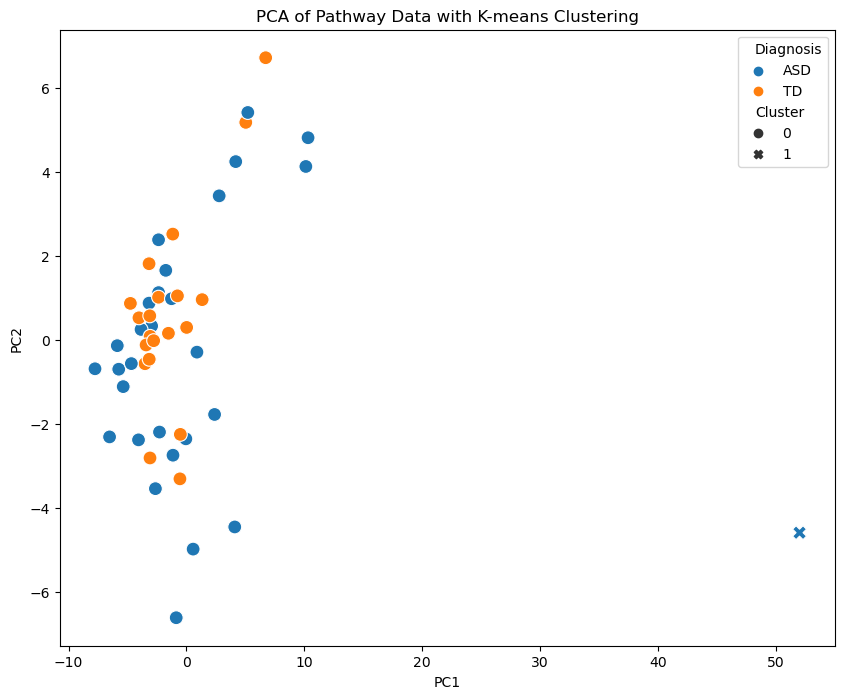

Percentage of ASD and TD samples in each cluster:
Diagnosis         ASD         TD
Cluster                         
0           58.333333  41.666667
1          100.000000   0.000000

Chi-square test p-value: 1.0

Top 10 contributing pathways:
    pathway  importance
83  ko00940    0.327454
49  ko00541    0.306998
96  ko01220    0.290972
57  ko00622    0.290153
9   ko00071    0.287152
31  ko00362    0.286276
39  ko00480    0.286164
44  ko00521    0.275482
45  ko00523    0.274908
36  ko00410    0.265280


In [11]:

# Load BIOM table
pathway = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195331_pathway.zebra.tp-td.biom')

# Convert the BIOM table to a DataFrame
pathway_df = pathway.to_dataframe(dense=True).T

# Load and prepare metadata
metadata_df = md.to_dataframe()
metadata_df = metadata_df.loc[pathway_df.index]

# Ensure we only have ASD and TD samples
metadata_df = metadata_df[metadata_df['dx'].isin(['ASD', 'TD'])]
pathway_df = pathway_df.loc[metadata_df.index]

# Normalize the data
scaler = StandardScaler()
pathway_df_scaled = pd.DataFrame(scaler.fit_transform(pathway_df), index=pathway_df.index, columns=pathway_df.columns)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pathway_df_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=pathway_df_scaled.index)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(pathway_df_scaled)

# Add cluster labels and diagnosis to PCA results
pca_df['Cluster'] = cluster_labels
pca_df['Diagnosis'] = metadata_df['dx']

# Visualize the results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diagnosis', style='Cluster', s=100)
plt.title('PCA of Pathway Data with K-means Clustering')
plt.show()

# Calculate the percentage of ASD and TD samples in each cluster
cluster_diagnosis = pd.crosstab(pca_df['Cluster'], pca_df['Diagnosis'], normalize='index') * 100
print("Percentage of ASD and TD samples in each cluster:")
print(cluster_diagnosis)

# Perform statistical test (chi-square) to check if the distribution is significant
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(pca_df['Cluster'], pca_df['Diagnosis'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value}")

# Identify top contributing pathways
feature_importance = pd.DataFrame({
    'pathway': pathway_df_scaled.columns,
    'importance': np.abs(pca.components_[0]) + np.abs(pca.components_[1])
})
top_pathways = feature_importance.sort_values('importance', ascending=False).head(10)
print("\nTop 10 contributing pathways:")
print(top_pathways)

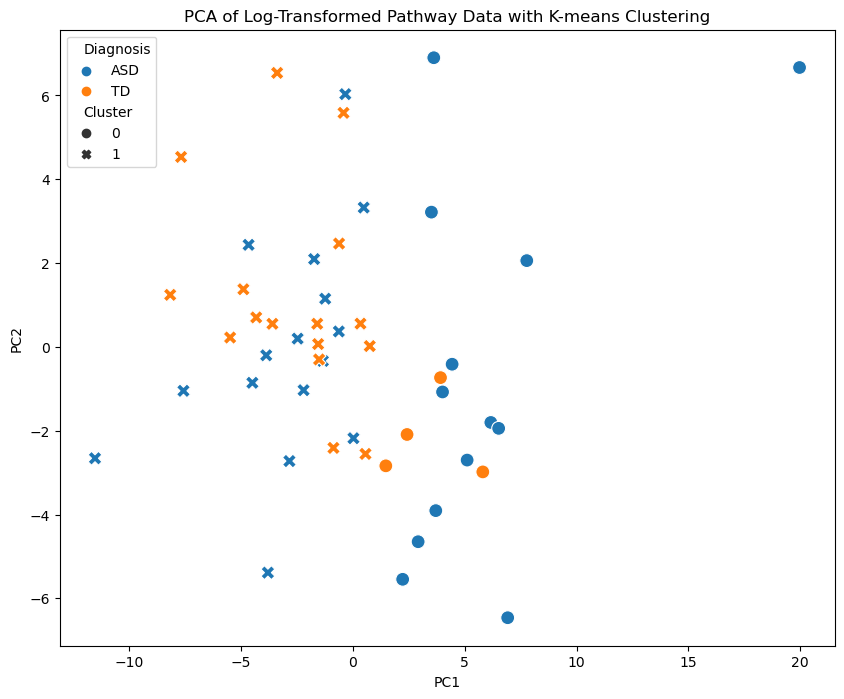

Percentage of ASD and TD samples in each cluster:
Diagnosis        ASD         TD
Cluster                        
0          76.470588  23.529412
1          50.000000  50.000000

Chi-square test p-value: 0.1364351882296052

Top 10 contributing pathways:
    pathway  importance
88  ko01057    0.550100
54  ko00592    0.542879
39  ko00480    0.478250
80  ko00906    0.367991
19  ko00261    0.347499
96  ko01220    0.317515
57  ko00622    0.303395
31  ko00362    0.301201
8   ko00062    0.300194
9   ko00071    0.242591


In [12]:
# Load BIOM table
pathway = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195331_pathway.zebra.tp-td.biom')

# Convert the BIOM table to a DataFrame
pathway_df = pathway.to_dataframe(dense=True).T

# Load and prepare metadata
metadata_df = md.to_dataframe()
metadata_df = metadata_df.loc[pathway_df.index]

# Ensure we only have ASD and TD samples
metadata_df = metadata_df[metadata_df['dx'].isin(['ASD', 'TD'])]
pathway_df = pathway_df.loc[metadata_df.index]

# Log transform the data
# Adding a small constant to avoid log(0)
pathway_df_log = np.log1p(pathway_df)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pathway_df_log)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=pathway_df_log.index)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(pathway_df_log)

# Add cluster labels and diagnosis to PCA results
pca_df['Cluster'] = cluster_labels
pca_df['Diagnosis'] = metadata_df['dx']

# Visualize the results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diagnosis', style='Cluster', s=100)
plt.title('PCA of Log-Transformed Pathway Data with K-means Clustering')
plt.show()

# Calculate the percentage of ASD and TD samples in each cluster
cluster_diagnosis = pd.crosstab(pca_df['Cluster'], pca_df['Diagnosis'], normalize='index') * 100
print("Percentage of ASD and TD samples in each cluster:")
print(cluster_diagnosis)

# Perform statistical test (chi-square) to check if the distribution is significant
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(pca_df['Cluster'], pca_df['Diagnosis'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value}")

# Identify top contributing pathways
feature_importance = pd.DataFrame({
    'pathway': pathway_df_log.columns,
    'importance': np.abs(pca.components_[0]) + np.abs(pca.components_[1])
})
top_pathways = feature_importance.sort_values('importance', ascending=False).head(10)
print("\nTop 10 contributing pathways:")
print(top_pathways)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Apply RCLR transformation
def rclr_transform(df):
    # Replace zeros with a small value to allow log transformation
    epsilon = 1e-5
    df_nonzero = df.replace(0, epsilon)
    
    # Log transform
    df_log = np.log(df_nonzero)
    
    # Calculate the mean of log values for each sample
    log_mean = df_log.mean(axis=1)
    
    # Subtract the log mean from each log-transformed value
    df_centered = df_log.sub(log_mean, axis=0)
    
    # Replace -inf values (resulting from log(epsilon)) with 0
    return df_centered.replace(-np.inf, 0)

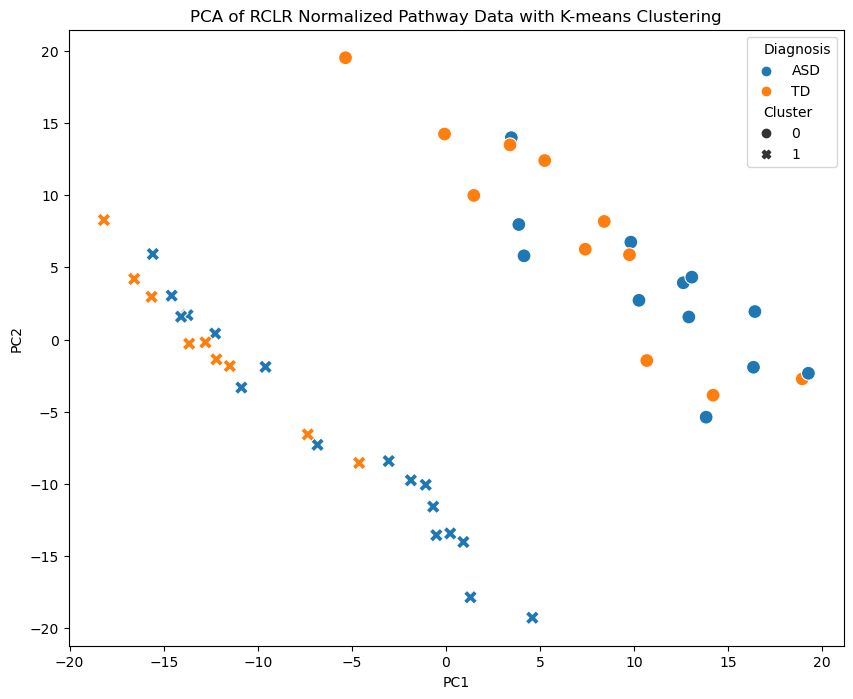

Percentage of ASD and TD samples in each cluster:
Diagnosis        ASD         TD
Cluster                        
0          52.173913  47.826087
1          65.384615  34.615385

Chi-square test p-value: 0.5171249194764598

Top 10 contributing pathways:
    pathway  importance
17  ko00253    0.944988
87  ko01056    0.941089
88  ko01057    0.841681
19  ko00261    0.786008
58  ko00623    0.438707
54  ko00592    0.416221
10  ko00120    0.276834
30  ko00361    0.196221
25  ko00311    0.194484
89  ko01059    0.147286


In [14]:
# Load BIOM table
pathway = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195331_pathway.zebra.tp-td.biom')

# Convert the BIOM table to a DataFrame
pathway_df = pathway.to_dataframe(dense=True).T

# Load and prepare metadata
metadata_df = md.to_dataframe()
metadata_df = metadata_df.loc[pathway_df.index]

# Ensure we only have ASD and TD samples
metadata_df = metadata_df[metadata_df['dx'].isin(['ASD', 'TD'])]
pathway_df = pathway_df.loc[metadata_df.index]

# Log transform the data
# Adding a small constant to avoid log(0)
pathway_df_log = rclr_transform(pathway_df)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pathway_df_log)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=pathway_df_log.index)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(pathway_df_log)

# Add cluster labels and diagnosis to PCA results
pca_df['Cluster'] = cluster_labels
pca_df['Diagnosis'] = metadata_df['dx']

# Visualize the results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diagnosis', style='Cluster', s=100)
plt.title('PCA of RCLR Normalized Pathway Data with K-means Clustering')
plt.show()

# Calculate the percentage of ASD and TD samples in each cluster
cluster_diagnosis = pd.crosstab(pca_df['Cluster'], pca_df['Diagnosis'], normalize='index') * 100
print("Percentage of ASD and TD samples in each cluster:")
print(cluster_diagnosis)

# Perform statistical test (chi-square) to check if the distribution is significant
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(pca_df['Cluster'], pca_df['Diagnosis'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value}")

# Identify top contributing pathways
feature_importance = pd.DataFrame({
    'pathway': pathway_df_log.columns,
    'importance': np.abs(pca.components_[0]) + np.abs(pca.components_[1])
})
top_pathways = feature_importance.sort_values('importance', ascending=False).head(10)
print("\nTop 10 contributing pathways:")
print(top_pathways)

In [15]:
pca_df.to_csv('/home/l1joseph/pierce_autism_2024/data/kegg/kegg_pathway_pca.tsv', sep='\t', index =True)
pca_df.head()

,PC1,PC2,Cluster,Diagnosis
15350.A9K3E.1,9.827460,6.745814,0,ASD
15350.C3P5B.1,-18.181717,8.280131,1,TD
15350.C3V4G.1,-14.580350,3.039474,1,ASD
15350.C3Z7C.1,0.227610,-13.432371,1,ASD
15350.C4H7T.1,-12.265949,0.412157,1,ASD


In [16]:
metadata_df.head()

,ados_cosotot,ados_cosototrrtot,ados_rrtot,ageatfecalsample,anonymized_name,antibiotics_last_2weeks,attend_daycare,breastfed_morethan1month,collection_date,collection_timestamp,...,sex,taxon_id,title,tube_id,vine_adapbehav_domstd,vine_comtotal_domstd,vine_dlytotal_domstd,vine_mtrtotal_domstd,vine_soctotal_domstd,zipcode
15350.A9K3E.1,17.0,21.0,4.0,28.0,X00235689,1.0,1,1.0,2022-10-11,2022-10-11,...,male,408170.0,Pierce ASD project,363146327.0,77.0,60.0,85.0,104.0,92.0,92124
15350.C3P5B.1,1.0,3.0,2.0,23.0,X00235491,1.0,1,1.0,2023-04-08,2023-04-08,...,male,408170.0,Pierce ASD project,363146276.0,92.0,98.0,90.0,95.0,95.0,92026
15350.C3V4G.1,14.0,20.0,6.0,22.0,X00235625,1.0,1,1.0,2023-06-02,2023-06-02,...,male,408170.0,Pierce ASD project,363146282.0,101.0,99.0,100.0,100.0,105.0,92103
15350.C3Z7C.1,8.0,11.0,3.0,17.0,X00235671,0.0,0,1.0,2023-05-07,2023-05-07,...,male,408170.0,Pierce ASD project,363146339.0,102.0,99.0,105.0,105.0,101.0,92082
15350.C4H7T.1,18.0,22.0,4.0,24.0,X00235624,0.0,0,1.0,2023-06-08,2023-06-08,...,male,408170.0,Pierce ASD project,363146250.0,83.0,83.0,92.0,104.0,84.0,91911


In [20]:
# Identify samples diagnosed as TD but clustered as 1
td_clustered_as_1 = pca_df[(pca_df['Diagnosis'] == 'TD') & (pca_df['Cluster'] == 1)]

# Display the results
print("Samples diagnosed as TD but clustered as 1:")
print(td_clustered_as_1)

# Get the count of such samples
count_td_clustered_as_1 = len(td_clustered_as_1)
print(f"\nNumber of TD samples clustered as 1: {count_td_clustered_as_1}")

# Calculate the percentage of TD samples that were clustered as 1
total_td_samples = len(pca_df[pca_df['Diagnosis'] == 'TD'])
percentage_td_clustered_as_1 = (count_td_clustered_as_1 / total_td_samples) * 100

print(f"\nPercentage of TD samples clustered as 1: {percentage_td_clustered_as_1:.2f}%")

Samples diagnosed as TD but clustered as 1:
                    PC1       PC2  Cluster Diagnosis
15350.C3P5B.1 -7.676750  4.531267        1        TD
15350.B4K6B.1 -4.316540  0.702425        1        TD
15350.B4L3P.1 -1.507560 -0.300271        1        TD
15350.C3Q6S.1 -8.162485  1.241218        1        TD
15350.B5A9V.1 -0.866110 -2.410264        1        TD
15350.C2Z9J.1 -4.890984  1.374419        1        TD
15350.B2S3Q.1 -0.414921  5.583605        1        TD
15350.C4X8Y.1 -3.593285  0.551062        1        TD
15350.C2P5A.1  0.758335  0.018926        1        TD
15350.C3Z6R.1 -1.591058  0.551719        1        TD
15350.A9F8Q.2  0.342687  0.554991        1        TD
15350.C3Y8F.1 -0.614304  2.465475        1        TD
15350.C3R3G.1  0.566054 -2.553704        1        TD
15350.B9F2B.1 -1.550319  0.067060        1        TD
15350.C3N5T.1 -3.382690  6.536997        1        TD
15350.C3H4A.1 -5.483248  0.222743        1        TD

Number of TD samples clustered as 1: 16

Percentage of

In [21]:
# List of sample IDs diagnosed as TD but clustered as 1
td_clustered_as_1_ids = ['15350.C3C5Z.1', '15350.C3Z8Y.1', '15350.B2M2J.1']

# Extract metadata for these samples
td_clustered_as_1_metadata = metadata_df.loc[td_clustered_as_1_ids]

# # Display the metadata for these samples
# print("Metadata for TD samples clustered as 1:")
# print(td_clustered_as_1_metadata)

# Load the CSV file
odd_cluster_df =pd.read_csv('td_samples_clustered_as_1_metadata.csv', index_col=0)

odd_cluster_df.head()


,ados_cosotot,ados_cosototrrtot,ados_rrtot,ageatfecalsample,anonymized_name,antibiotics_last_2weeks,attend_daycare,breastfed_morethan1month,collection_date,collection_timestamp,...,sex,taxon_id,title,tube_id,vine_adapbehav_domstd,vine_comtotal_domstd,vine_dlytotal_domstd,vine_mtrtotal_domstd,vine_soctotal_domstd,zipcode
15350.C3C5Z.1,2.0,3.0,1.0,14.0,X00235578,0.0,0,1.0,2023-02-14,2023-02-14,...,female,408170.0,Pierce ASD project,363146318.0,111.0,108.0,110.0,102.0,112.0,92127
15350.C3Z8Y.1,5.0,7.0,2.0,29.0,X00235676,0.0,1,1.0,2023-05-18,2023-05-18,...,male,408170.0,Pierce ASD project,363146284.0,88.0,97.0,92.0,83.0,86.0,92014
15350.B2M2J.1,2.0,4.0,2.0,32.0,X00235458,0.0,1,0.0,2022-09-18,2022-09-18,...,female,408170.0,Pierce ASD project,363146278.0,87.0,91.0,92.0,85.0,89.0,92128


In [22]:
# Creating a df that indicates whether the sample is TP in on or more of the eye-tracking metrics.(cumulative-Eye-Tracking-TP)

dx_eyetrack = pd.DataFrame(index=odd_cluster_df.index)  # Create a new DataFrame with the same index as metadata

dx_eyetrack['dx_eyetrack'] = odd_cluster_df[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']].apply(lambda x: 1 if 'TP' in x.values else 0, axis=1)

dx_eyetrack.to_csv('data/metadata/Dx_Eyetrack.tsv', sep='\t', index =True)
dx_eyetrack['dx_eyetrack'].value_counts()



0    3
Name: dx_eyetrack, dtype: int64

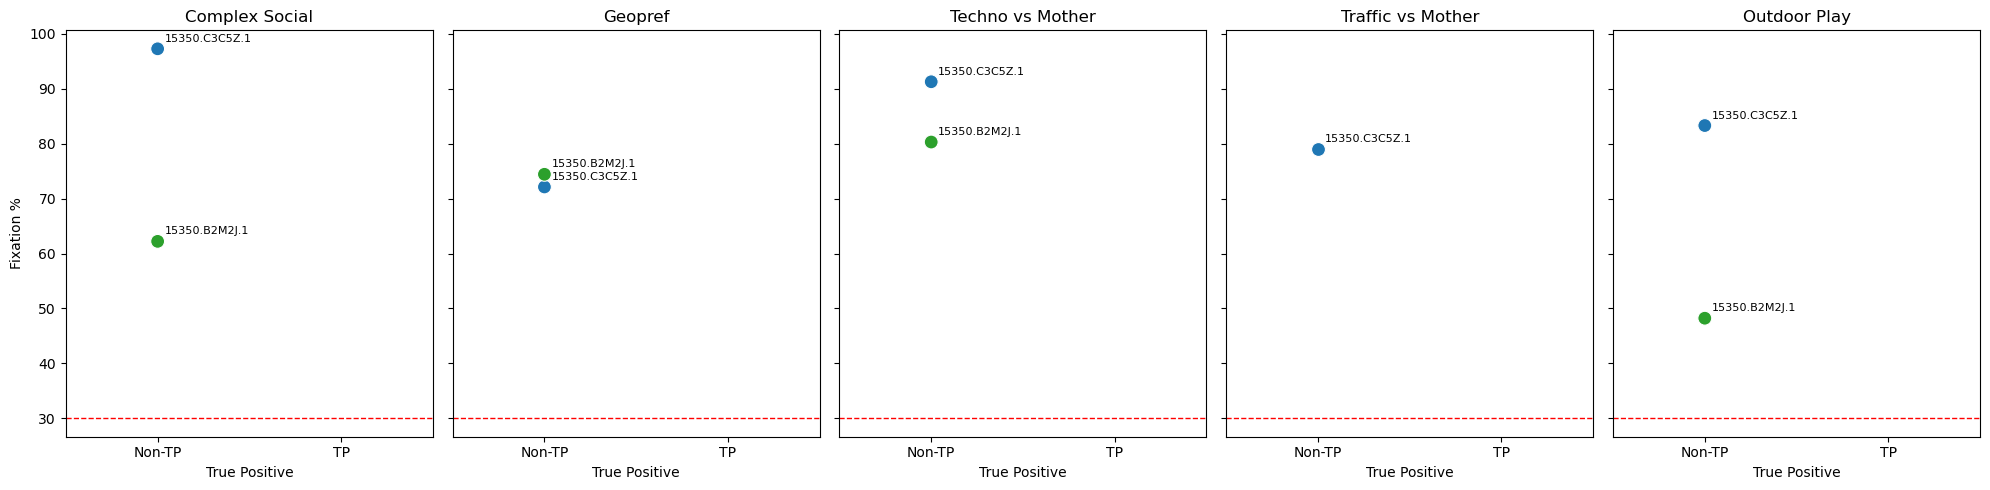

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming metadata is your full metadata DataFrame
# Filter the metadata for the specific samples
sample_ids = ['15350.C3C5Z.1', '15350.C3Z8Y.1', '15350.B2M2J.1']
filtered_metadata = odd_cluster_df.loc[sample_ids]

# Create the plot
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Function to create each subplot
def create_subplot(ax, x, y, title, data):
    sns.scatterplot(x=x, y=y, data=data, ax=ax, s=100, hue=data.index, legend=False)
    for i, sample in enumerate(data.index):
        ax.annotate(sample, (data.loc[sample, x], data.loc[sample, y]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    ax.set_title(title)
    ax.set_xlabel('True Positive')
    ax.axhline(30, color='red', linestyle='--', linewidth=1)

# Plot 1: Complex Social
create_subplot(axes[0], 'complexsocial_truepositive', 'complexsocial_percentfixationsocial', 'Complex Social', filtered_metadata)
axes[0].set_ylabel('Fixation %')

# Plot 2: Geopref
create_subplot(axes[1], 'geopref_truepositive', 'geopref_percentfixationsocial', 'Geopref', filtered_metadata)

# Plot 3: Techno vs Mother
create_subplot(axes[2], 'mtrtechno_truepositive', 'mtrtechno_percentfixationmotherese', 'Techno vs Mother', filtered_metadata)

# Plot 4: Traffic vs Mother
create_subplot(axes[3], 'mtrtraffic_truepositive', 'mtrtraffic_percentfixationmotherese', 'Traffic vs Mother', filtered_metadata)

# Plot 5: Outdoor Play
create_subplot(axes[4], 'outdoorplay_truepositive', 'outdoorplay_percentfixationsocial', 'Outdoor Play', filtered_metadata)

# Adjust x-axis for better visibility
for ax in axes:
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Non-TP', 'TP'])

plt.tight_layout()
plt.show()

/home/l1joseph/miniforge3/envs/qiime2-2022.8/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/l1joseph/miniforge3/envs/qiime2-2022.8/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/l1joseph/miniforge3/envs/qiime2-2022.8/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/l1joseph/miniforge3/envs/qiime2-2022.8/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient pale

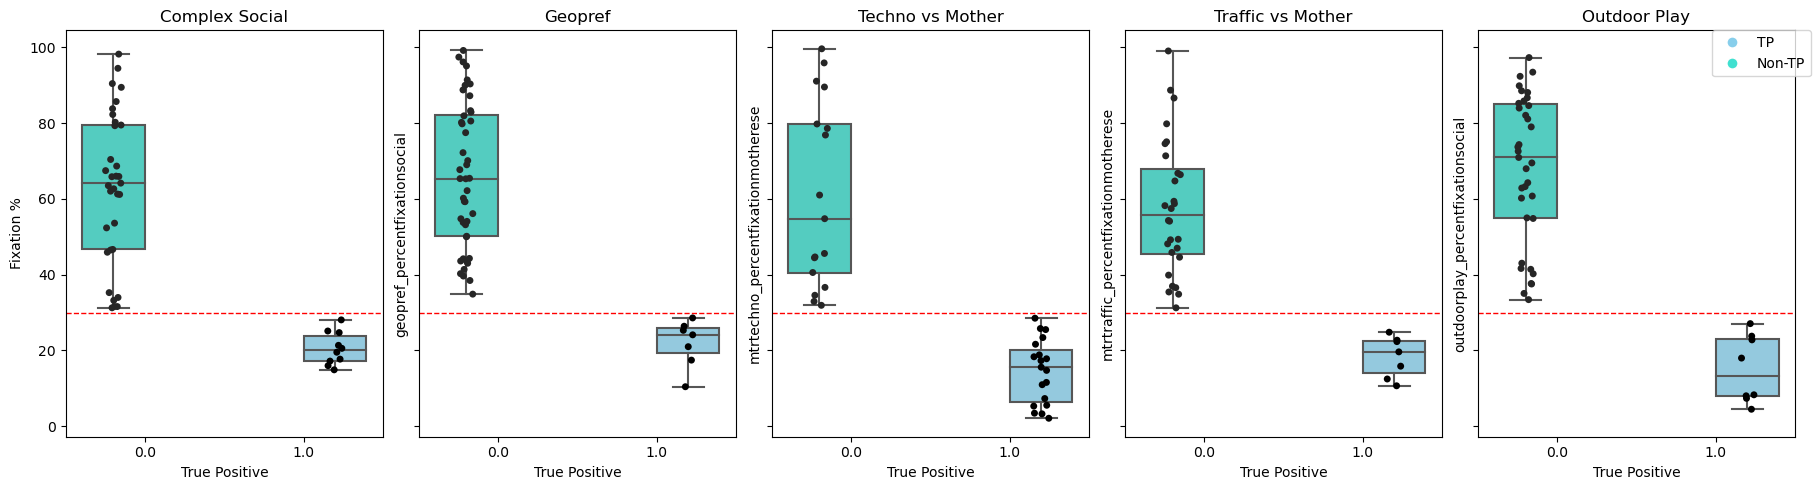

In [24]:
metadata = pd.read_csv('data/metadata/Metadata_Final.tsv', sep='\t', index_col=0)
asd_metadata = metadata[metadata['dx'] == 'ASD']
td_metadata = metadata[metadata['dx'] == 'TD']

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Plot 1: Complex Social
sns.boxplot(x='complexsocial_truepositive', y='complexsocial_percentfixationsocial', data=asd_metadata, hue='complexsocial_truepositive', ax=axes[0], palette=['turquoise', 'skyblue'])
sns.stripplot(x='complexsocial_truepositive', y='complexsocial_percentfixationsocial', data=asd_metadata, hue='complexsocial_truepositive', dodge=True, jitter=True, ax=axes[0], color = 'black')
axes[0].set_title('Complex Social')
axes[0].set_xlabel('True Positive')
axes[0].set_ylabel('Fixation %')
axes[0].legend(loc='upper right', fontsize="7").set_visible(False)
axes[0].axhline(30, color='red', linestyle='--', linewidth=1)

# Plot 2: Geopref
sns.boxplot(x='geopref_truepositive', y='geopref_percentfixationsocial', data=asd_metadata, hue='geopref_truepositive', ax=axes[1], palette=['turquoise', 'skyblue'])
sns.stripplot(x='geopref_truepositive', y='geopref_percentfixationsocial', data=asd_metadata, hue='geopref_truepositive', dodge=True, jitter=True, ax=axes[1], color = 'black')
axes[1].set_title('Geopref')
axes[1].set_xlabel('True Positive')
axes[1].legend(loc='upper right', fontsize="7").set_visible(False)
axes[1].axhline(30, color='red', linestyle='--', linewidth=1)

# Plot 3: Techno vs Mother
sns.boxplot(x='mtrtechno_truepositive', y='mtrtechno_percentfixationmotherese', data=asd_metadata, hue='mtrtechno_truepositive', ax=axes[2], palette=['turquoise', 'skyblue'])
sns.stripplot(x='mtrtechno_truepositive', y='mtrtechno_percentfixationmotherese', data=asd_metadata, hue='mtrtechno_truepositive', dodge=True, jitter=True, ax=axes[2], color = 'black')
axes[2].set_title('Techno vs Mother')
axes[2].set_xlabel('True Positive')
axes[2].legend(loc='upper right', fontsize="7").set_visible(False)
axes[2].axhline(30, color='red', linestyle='--', linewidth=1)

# Plot 4: Traffic vs Mother
sns.boxplot(x='mtrtraffic_truepositive', y='mtrtraffic_percentfixationmotherese', data=asd_metadata, hue='mtrtraffic_truepositive', ax=axes[3], palette=['turquoise', 'skyblue'])
sns.stripplot(x='mtrtraffic_truepositive', y='mtrtraffic_percentfixationmotherese', data=asd_metadata, hue='mtrtraffic_truepositive', dodge=True, jitter=True, ax=axes[3], color = 'black')
axes[3].set_title('Traffic vs Mother')
axes[3].set_xlabel('True Positive')
axes[3].legend(loc='upper right', fontsize="7").set_visible(False)
axes[3].axhline(30, color='red', linestyle='--', linewidth=1)

# Plot 5: Outdoor Play
sns.boxplot(x='outdoorplay_truepositive', y='outdoorplay_percentfixationsocial', data=asd_metadata, hue='outdoorplay_truepositive', ax=axes[4], palette=['turquoise', 'skyblue'])
sns.stripplot(x='outdoorplay_truepositive', y='outdoorplay_percentfixationsocial', data=asd_metadata, hue='outdoorplay_truepositive', dodge=True, jitter=True, ax=axes[4], color = 'black')
axes[4].set_title('Outdoor Play')
axes[4].set_xlabel('True Positive')
axes[4].legend(loc='upper right', fontsize="7")
axes[4].axhline(30, color='red', linestyle='--', linewidth=1)

# Create custom legend
custom_labels = ['TP', 'Non-TP']
custom_handles = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=color, markersize=8) for color in ['skyblue', 'turquoise']]
plt.legend(custom_handles, custom_labels, loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.subplots_adjust(right= 0.9)  # Adjust the right spacing to make room for the legend
plt.show()

In [26]:
# print(td_metadata['complexsocial_percentfixationsocial'])
print(td_metadata['geopref_percentfixationsocial'])


sample_name
15350.A9F8Q.2    94.300457
15350.B2M2J.1    74.439217
15350.B2S3Q.1    80.564711
15350.B4K6B.1    86.281759
15350.B4L3P.1    93.705637
15350.B5A9V.1    78.262830
15350.B9F2B.1    86.044602
15350.C2P5A.1    82.609983
15350.C2Y2F.2    97.242349
15350.C2Z9J.1    84.965776
15350.C3C5Z.1    72.130741
15350.C3H4A.1    94.443020
15350.C3N5T.1    82.653754
15350.C3P5B.1          NaN
15350.C3Q6S.1    84.749696
15350.C3R3G.1    69.164978
15350.C3Y8F.1    90.539054
15350.C3Z6R.1    97.985857
15350.C3Z8Y.1          NaN
15350.C4X8Y.1    91.847845
Name: geopref_percentfixationsocial, dtype: float64
